# PDAs and context-free grammars

Moving on from DFAs, NFAs and regular languages, we next consider more powerful models of computation, namely pushdown automata (PDAs) and context-free grammars (CFGs).
These turn out to be analogous to finite-state automata and regular languages, but are more powerful.
In particular, we will show that CFGs and PDAs are equivalent and that they are strict supersets of regular languages and NFAs.


## Context-free grammars

A CFG consists of variables and terminal symbols, as well as rules which expand these variables into strings of other variables and terminal symbols.


:::{prf:definition} Context-free grammar

A context-free grammar (CGG) is a 4-tuple $(V, \Sigma, R, S)$, where

1. $V$ is a finite set called the variables,
2. $\Sigma$ is a finite set that is disjoint from $V$, called the terminals,
3. $R$ is a finite set of rules, with each rule being a pair consisting of a variable and a string of variables and terminals,
4. $S \in V$ is the start variable.

:::


We now introduce some terminology on CFGs.
We say that a string yields another if the latter can be obtained by applying a rule of a CFG onto the former.
Similarly, we say that a string derives another if the latter can be obtained by applying a finite number of rules to it.

:::{prf:definition} Yields, derives

If $A \to w$ is a rule of a CFG, we say that $uAv$ yields $uwv$, written $uAv \implies uwv$.
We say that $u$ derives $v$, written $u \stackrel{*}{\implies} v$, if a sequence $u_1, u_2, \dots u_k$ exists for some $k \geq 0$ such that

$$u \implies u_1 \implies \dots \implies u_k \implies v.$$

:::


Similarly to DFAs and NFAs, we define the language of a CFG to be the set of strings it can represent, i.e. the set of strings that can be derived from it.

:::{prf:definition} Context-free language

We define the language of a CFG $G$ with terminals $\Sigma$ and start variable $S$, to be the set $L(G) \equiv \{w \in \Sigma^* | S \stackrel{*}{\implies} w\}.$

:::

We can now look at a couple of examples of CFGs and strings that these generate.
We can visualise the derivation of a string in a language using a parse tree, where each node is a variable or terminal symbol and each edge corresponds to part of a substitution rule.
First is the following example of a CFG which generates all strings of the form $\texttt{0}^k\texttt{1}^k$ for some $k \geq 0$.
We already know that this set of strings is not a regular language.
Therefore, this example shows that the set of context-free languages (CFLs) is not equal to the set of regular languages.

:::{prf:example} Example CFG

Consider the CFG $G_1 = (V, \Sigma, R, S)$ where $V = \{S, E\}, \Sigma = \{\texttt{0}, \texttt{1}\}$ and $R$ consists of the rules

$$\begin{align}
S &\to \texttt{0}S\texttt{1} \\
S &\to E \\
E &\to \epsilon
\end{align}$$

Below is an example of a derivation of the string $\texttt{0011}$ using this language.
:::

In [12]:
import cairosvg
import nltk

from nltk import CFG
from nltk.parse import RecursiveDescentParser
from IPython.display import Image, display

def parse_and_show_trees(grammar, sentence):
    """
    Given a CFG `grammar` and a sentence `sentence`, parse `sentence` and show
    the parse trees associated with this sentence.

    Arguments:
        grammar: CFG, context free grammar to use
        sentence: str, string to parse
    """

    # Create a parser from the grammar and parse the string
    parser = RecursiveDescentParser(grammar)
    trees = list(parser.parse(sentence))

    # Check at least one parse tree exists
    assert len(trees) > 0, f"Sentence not in the CFG."

    # Parse the sentence and get the first parse tree
    for tree in trees:
    
        parse_tree_png = cairosvg.svg2png(
            tree._repr_svg_(),
            background_color="white",
        )
        
        display(Image(parse_tree_png))

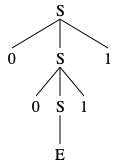

In [13]:
# Define CFG
grammar = CFG.fromstring(
    """
       S -> '0'S'1'
       S -> E
       E ->  
    """
)

# Define a sentence to parse
parse_and_show_trees(grammar=grammar, sentence=list("0011"))

We also have the following example CFG which generates valid mathematical expressions involving sums and multiplications.
CFGs similar to this can be used to define parsers for programming languages.

:::{prf:example} Example CFG for mathematical expressions

Consider the CFG $G_2 = (V, \Sigma, R, S)$ where $V = \{E, T, F\}, \Sigma = \{\texttt{a}, \texttt{(}, \texttt{)}\}, S = E$ and $R$ consists of the rules

$$\begin{align}
E &\to T~|~F+T \\
T &\to F~|~F*T \\
F &\to \texttt{(}E\texttt{)}~|~\texttt{a} \\
\end{align}$$

Below is an example of a derivation of the string $\texttt{a*(a+a)}$ using this language.
:::

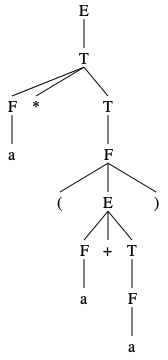

In [14]:
# Define CFG
grammar = CFG.fromstring(
"""
    E -> T | F'+'T
    T -> F | F'*'T
    F -> '('E')' | 'a'
"""
)

# Define a sentence to parse
parse_and_show_trees(grammar=grammar, sentence=list("a*(a+a)"))

Sometimes, a string in a CFL can be derived in more than one way (even if we account for applications of the same rules in different orders).
In such cases, the language is ambiguous in the sense that there may be more than one parse tree that correspond to the same given string.
The following definitions formalise this notion.

:::{prf:definition} Leftmost derivation

We call a derivation of a string in a CFG a leftmost derivation if at every step of the derivation the leftmost variable is the one that is replaced.
:::


This idea allows us to succinctly define ambiguous languages.

:::{prf:definition} Ambiguity

We say that a string $w$ is derived ambiguously from a CFG $G$, if there is more than one leftmost derivation of $w$ in $G$.
If a CFG $G$ contains a string that can be derived ambiguously, we say that $G$ is ambiguous.
If a CFL can only be generated by an ambiguous CFG, we say it is inherently ambiguous.
:::

Some CFLs are inherently ambiguous, which means that they can be generated only by ambiguous grammars.

## Chomsky normal form

:::{prf:definition} Chomsky normal form

A context-free grammar is in Chomsky normal form if every rule is of the form

$$\begin{align}
A &\to BC
A &\to a
\end{align}$$

where $a$ is any terminal and $A,$ $B,$ and $C$ are any variables, except that $B$ and $C$ may not be the start variable.
In addition, we permit the rule $S \to \epsilon$ where $S$ is the start variable.

:::


:::{prf:lemma} CFLs generated by CFG in Chomsky normal form

Any context-free language is generated by a context-free grammar in Chomsky normal form.

:::


:::{dropdown} Proof (CFLs generated by CFG in Chomsky normal form)

Let $L$ be a CFL.
Then there exists a CFG $G = (V, \Sigma, R, S)$ that generates it.
We will convert $G$ into an equivalent CFG $G'$ in normal form by adding a new start variable, then eliminating all $\epsilon$-rules of the form $A \to \epsilon,$ all unit rules of the form $A \to B,$ and converting all remaining rules in proper form.

__Step 1:__
First, define a new start variable $S_0$ and the rule $S_0 \to S.$
This ensures that the start variable does not occur in the right hand side of a rule.

__Step 2:__
Second, we eliminate all $\epsilon$-rules of the form $A \to \epsilon$ as follows.
For each occurrence of a rule of the kind $A \to \epsilon,$ first we remove the rule and then for each occcurence of $A$ on the right hand side of any other rule, we add a new rule with that occurence deleted.
For example, if we remove $A \to \epsilon$ and there is another rule of the form $R \to uAvAw$ (where $u, v, w$ are strings of terminals and variables) we add the rules $R \to uvAw, R \to uAvw$ and $R \to uvw$ to the grammar.
We repeat these steps until we have removed all $\epsilon$-rules not involving the start variable.
This procedure is guaranteed to terminate because at each step the number of $\epsilon$-rules decreases by one, until it reaches zero.

__Step 3:__
Third, we handle unit rules.
If there is a unit rule of the form $A \to B$ we remove it.
Then for each occurence of a rule of the type $B \to u$ (where $u$ is a string of terminals and variables) appears, we add $A \to u,$ unless this was a unit rule that we removed previously.
We repeat this step until we have removed all unit rules.
This procedure is also guaranteed to terminate: there is a finite set of variables and thus a finite set of unit rules; since at each step we remove a unit rule and do not allow it to be re-introduced later in this procedure, at some point we will have removed all unit rules, and the procedure will terminate.

__Step 4:__
Last, we convert all remaining rulles in proper form.
We replace each rule $A \to u_1 \dots u_k, k \geq 3,$ where each $u_i$ is a variable or terminal symbol, with the rules $A \to u_1 A_1, A_1 = u_2 A_2 \dots, A_{k-2} \to u_{k-1} u_k,$ where the $A_i$ are new variables.
We replace every terminal $u_i$ in the preceeding rules with a new variable $U_i$ and add the rule $U_i \to u_i.$
We repeat this step until all the rules are in proper form.
Again, this procedure guaranteed to terminate since it is applied exactly once for every rule that was not originally in normal form.

The grammar $G'$ that results after these steps satisfies the requirements for being in Chomsky normal form, as required.

:::

## Pushdown Automata

Now we move to pushdown automata (PDA), which are another kind of computational model.
PDAs are similar to NFAs in that they have a finite number of states and allow for nondeterminism.
We will show that PDAs have the same expressive power as CFGs, in a somewhat analogous way that NFAs have the same power as regular expressions.
It will turn out that PDAs are very useful in this sense because they provide another way to prove things about CFLs, in addition to CFGs.
PDAs extend NFAs by introducing a stack of symbols, from which they can read symbols as well as add new ones or remove existing symbols.
The stack itself can be of infinite length, which is what makes PDAs more powerful than NFAs.


:::{prf:definition} Pushdown automaton (PDA)

A pushdown automaton is a $6$-tuple $(Q, \Sigma, \Gamma, \delta, q_0, F),$ where $Q, \Sigma, \Gamma$ and $F$ are all finite sets, and

1. $Q$ is a finite set, the set of states,
2. $\Sigma$ is a finite set, the input alphabet,
3. $\Gamma$ is a finite set, the stack alphabet,
4. $\delta : Q \times \Sigma_\epsilon \times \Gamma_\epsilon \to \mathcal{P}(Q \times \Gamma_\epsilon)$ is a function, the transition funciton,
5. $q_0 \in Q$ is the start state,
6. $F \subseteq Q$ is the set of accept states.

:::

Crucially a PDA can only read, write or remove symbols at the top of the stack.
Now we define what it means for a PDA to accept a string, which is analogous to an NFA accepting a string.


:::{prf:definition} PDA accepts

A pushdown automaton $M = (Q, \Sigma, \Gamma, \delta, q_0, F)$ acccepts an input $w$ if it can be written in the form $w = w_1w_2 \dots w_m, w_i \in \Sigma_\epsilon,$ and there exist sequences of states $r_0, r_1, \dots, r_m \in Q$ and strings $s_0, s_1, \dots, s_m \in \Gamma^*$ that satisfy

1. $r_0 = q_0$ and $s_0 = \epsilon.$
2. For $i = 0, \dots, m - 1,$ we have $(r_{i+1}, b) \in \delta(r_i, w_{i+1}, a),$ where $s_i = at, s_{i+1} = bt$ with $a, b \in \Gamma_\epsilon$ and $t \in \Gamma^*.$
3. $r_m \in F.$

:::

## Context Free Pumping Lemma

:::{prf:theorem} Pumping Lemma for CFLs
:label: toc-cfl-pumping-lemma

For every CFL $A$, there exists an integer $p$ such that if $s \in A$ and $|s| \geq p$, then $s = uvxyz$ where

1. $uv^ixy^iz \in A$ for all $i \geq 0$,
2. $vy \neq \epsilon$,
3. $|vxy| \leq p$.

:::

::::{prf:example} A non-context-free language


The language $A = \{0^k1^k2^k | k \geq 0\}$ is not a CFL.

:::{dropdown} Proof

Suppose $A = \{0^k1^k2^k | k \geq 0\}$ is CFL.
Then by the {ref}`pumping lemma for CFLs<toc-cfl-pumping-lemma>`, it has a pumping length $p$.
Let $s = 0^p 1^p 2^p$.
By the pumping lemma, it holds that $s = uvxyz$, such that the pumping lemma conditions hold.
By the condition $|vxy| \leq p$, the substring $vxy$ cannot both contain both zeros andd twos.
Therefore, $uv^ixy^iz$ will not contain equal numbers of zeros and twos when $i \geq 2,$ which contradicts the pumping lemma.
So $A$ is not a CFL.
:::
::::

::::{prf:lemma} CFL not closed under intersection

The class of context-free languages are not closed under intersection.

:::{dropdown} Proof

The languages $A_1 = \{0^k 1^k 2^l | k, l \geq 0\}$ and $A_2 = \{0^l 1^k 2^k | k, l \geq 0\}$ are context free since we can build PDAs that recognise them.
For example, for $A_1$ we can construct a PDA which pushes the zeros on its stack, then pops them as it reads the ones, and lastly read any number of twos.
Similarly we can build a PDA that recognises $A_2$.
However, $A_1 \cap A_2 = \{0^k 1^k 2^k | k \geq 0 \}$, which is not a CFL, so the class of CFLs is not closed under intersection.
:::
::::